In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ising.one_dimensional.checkerboard import simulate, H
from ising.data_farm import magnetization_from_line_lattices, magnetization_convergence
from ising.one_dimensional.lattice import random_lattice

In [2]:
line_lattice = random_lattice(10_000)

In [3]:
def cv_plot(line_lattice, iterations, h_J, points=1000):

    Ts = np.linspace(0.1, 15, points)
    cv = np.empty( (points,) )

    for i, T in enumerate(Ts):
        cv[i] = np.var([H(frame, h_J)*T for frame in simulate(line_lattice.copy(), h_J, T, iterations)])

    import ising.plot_styling
    

    plt.plot(Ts, cv)

    plt.ylabel("$C_v$")
    plt.xlabel("Temperature")
    plt.title(f"$h/J = {h_J}$")


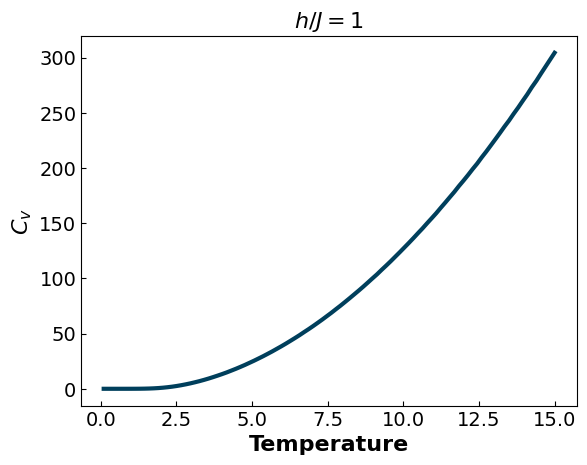

In [5]:
h_J = 1
cv_plot(line_lattice=line_lattice, iterations=1000, h_J=h_J, points=100)
plt.savefig(f"report-figures/1d/1d-cv-h={h_J}.pdf", bbox_inches="tight")
# from ising.analytic_results import magnetization1d
# Ts = np.linspace(0.1, 100, 1000)
# plt.plot(Ts, magnetization1d(Ts, h_J))

# plt.legend(["numerical", "analytical"])
# plt.savefig(f"report-figures/1d/1d-h={h_J}comp.pdf", bbox_inches="tight")